In [1]:
## Make sure to check all lables and such before turning it in


In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

df = pd.read_csv('student-por.csv')

In [3]:
## check data for missing and catergorical features

In [4]:
print("#samples: {}, #features: {}".format(df.shape[0], df.shape[1]))
print(df.isnull().sum())

print(df.dtypes)

#samples: 649, #features: 33
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher    

In [5]:
#lots of the feautres catergorical so I have to use encoding to make the feautres useable


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder




labelencoder = LabelEncoder()
df['school'] = labelencoder.fit_transform(df['school'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df['address'] = labelencoder.fit_transform(df['address'])
df['famsize'] = labelencoder.fit_transform(df['famsize'])
df['Pstatus'] = labelencoder.fit_transform(df['Pstatus'])
df['Mjob'] = labelencoder.fit_transform(df['Mjob'])
df['Fjob'] = labelencoder.fit_transform(df['Fjob'])
df['reason'] = labelencoder.fit_transform(df['reason'])
df['guardian'] = labelencoder.fit_transform(df['guardian'])
df['schoolsup'] = labelencoder.fit_transform(df['schoolsup'])
df['famsup'] = labelencoder.fit_transform(df['famsup'])
df['paid'] = labelencoder.fit_transform(df['paid'])
df['activities'] = labelencoder.fit_transform(df['activities'])
df['nursery'] = labelencoder.fit_transform(df['nursery'])
df['higher'] = labelencoder.fit_transform(df['higher'])
df['internet'] = labelencoder.fit_transform(df['internet'])
df['romantic'] = labelencoder.fit_transform(df['romantic'])

print(df.dtypes)


# using min-Max normalization on data
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object


In [7]:
## all of the data has been preprocessed now i want to visualize the 
## data to better understand it

In [8]:
#first i will use a heatmap

hcorr = df.corr()
hcorr.style.background_gradient()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.083050,0.087170,-0.354520,0.022252,0.028120,-0.254787,-0.209806,-0.206829,-0.081872,-0.109754,-0.062333,0.252936,-0.137857,0.113788,-0.123340,-0.063720,-0.007905,-0.088604,0.004659,-0.136112,-0.240486,0.072241,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.292626,-0.269776,-0.284294
sex,-0.083050,1.000000,-0.043662,0.025503,0.098205,0.064700,0.119127,0.083913,0.149635,0.080466,0.010732,-0.036811,0.040880,-0.206214,0.073888,-0.111202,-0.129467,0.079300,0.124707,-0.043603,-0.058134,0.065911,-0.110144,0.083473,0.146305,0.058178,0.282696,0.320785,0.139547,0.021336,-0.104109,-0.104005,-0.129077
age,0.087170,-0.043662,1.000000,-0.025848,-0.002470,-0.005631,-0.107832,-0.121050,-0.071770,-0.050846,-0.025855,0.266830,0.034490,-0.008415,0.319968,-0.167841,-0.101894,-0.005458,-0.054279,-0.021441,-0.265497,0.013115,0.178810,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
address,-0.354520,0.025503,-0.025848,1.000000,0.046113,-0.094635,0.190320,0.141493,0.159761,-0.006535,-0.002367,-0.019359,-0.344902,0.062023,-0.063824,0.017956,0.005577,-0.030483,-0.009278,0.018077,0.076706,0.175794,-0.030939,-0.033897,-0.036647,0.015475,-0.047304,-0.012416,0.003787,0.073653,0.157127,0.154600,0.167637
famsize,0.022252,0.098205,-0.002470,0.046113,1.000000,-0.239608,-0.014325,-0.039538,0.019600,-0.059443,0.032321,0.000872,0.012794,-0.010945,-0.066068,-0.056405,-0.039819,-0.050253,-0.014790,0.100686,0.004523,0.013357,-0.032936,0.004641,-0.021257,-0.004312,0.060482,0.081958,0.002448,0.004645,0.047230,0.038891,0.045016
Pstatus,0.028120,0.064700,-0.005631,-0.094635,-0.239608,1.000000,-0.057174,-0.031856,-0.028874,0.054306,-0.031486,-0.169904,0.040633,-0.008748,-0.009881,-0.009456,0.010203,0.015923,0.101555,-0.032724,0.022726,0.059754,-0.053828,0.051303,0.037585,0.031086,0.041513,0.070976,0.012638,-0.117492,0.015251,0.018689,-0.000754
Medu,-0.254787,0.119127,-0.107832,0.190320,-0.014325,-0.057174,1.000000,0.647477,0.459337,0.152582,0.132855,-0.014044,-0.265079,0.097006,-0.172210,-0.022168,0.120491,0.113973,0.119354,0.125951,0.213896,0.266052,-0.030992,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.209806,0.083913,-0.121050,0.141493,-0.039538,-0.031856,0.647477,1.000000,0.290703,0.211604,0.080760,-0.101764,-0.208288,0.050400,-0.165915,0.023572,0.135191,0.094628,0.079700,0.074863,0.191735,0.183483,-0.067675,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
Mjob,-0.206829,0.149635,-0.071770,0.159761,0.019600,-0.028874,0.459337,0.290703,1.000000,0.202651,0.059397,0.008196,-0.164126,0.057176,-0.117882,0.007992,0.038817,0.011869,0.099962,0.041927,0.148116,0.260658,-0.074286,0.025049,0.053927,0.003182,0.049576,0.025657,0.081525,0.028519,0.181551,0.153875,0.148252
Fjob,-0.081872,0.080466,-0.050846,-0.006535,-0.059443,0.054306,0.152582,0.211604,0.202651,1.000000,0.042846,-0.075056,0.004749,-0.019125,-0.055415,-0.013396,-0.038630,-0.020841,0.018356,-0.045800,0.089929,0.088625,-0.002835,0.039500,-0.037952,-0.031913,0.055389,0.044607,-0.025069,-0.047477,0.109847,0.086343,0.052953


In [9]:
## the heatmap with every data point is hard to read and makes clear that not every point has a large impact on
## a students grades. Becuase of this i am going to make another map with the features which had the highest 
## corr with grades

In [10]:
# Removing the features with a low corr score

df_copy = df.drop(columns = ['school', 'sex', 'age', 'famsize', 'Pstatus', 'guardian', 
                       'traveltime', 'failures', 'schoolsup', 'famsup', 'paid',
                       'activities', 'nursery', 'freetime', 'goout', 'Dalc', 'Walc',
                       'health', 'absences', 'famrel', 'romantic'])

print(df_copy.dtypes)

address      float64
Medu         float64
Fedu         float64
Mjob         float64
Fjob         float64
reason       float64
studytime    float64
higher       float64
internet     float64
G1           float64
G2           float64
G3           float64
dtype: object


In [11]:
#print out a new heatmap

hcorr = df_copy.corr()
hcorr.style.background_gradient()



,address,Medu,Fedu,Mjob,Fjob,reason,studytime,higher,internet,G1,G2,G3
address,1.000000,0.190320,0.141493,0.159761,-0.006535,-0.002367,0.062023,0.076706,0.175794,0.157127,0.154600,0.167637
Medu,0.190320,1.000000,0.647477,0.459337,0.152582,0.132855,0.097006,0.213896,0.266052,0.260472,0.264035,0.240151
Fedu,0.141493,0.647477,1.000000,0.290703,0.211604,0.080760,0.050400,0.191735,0.183483,0.217501,0.225139,0.211800
Mjob,0.159761,0.459337,0.290703,1.000000,0.202651,0.059397,0.057176,0.148116,0.260658,0.181551,0.153875,0.148252
Fjob,-0.006535,0.152582,0.211604,0.202651,1.000000,0.042846,-0.019125,0.089929,0.088625,0.109847,0.086343,0.052953
reason,-0.002367,0.132855,0.080760,0.059397,0.042846,1.000000,0.135874,0.091324,0.110168,0.155556,0.157459,0.124969
studytime,0.062023,0.097006,0.050400,0.057176,-0.019125,0.135874,1.000000,0.188256,0.037529,0.260875,0.240498,0.249789
higher,0.076706,0.213896,0.191735,0.148116,0.089929,0.091324,0.188256,1.000000,0.070345,0.349030,0.331953,0.332172
internet,0.175794,0.266052,0.183483,0.260658,0.088625,0.110168,0.037529,0.070345,1.000000,0.139931,0.147909,0.150025
G1,0.157127,0.260472,0.217501,0.181551,0.109847,0.155556,0.260875,0.349030,0.139931,1.000000,0.864982,0.826387


Medu


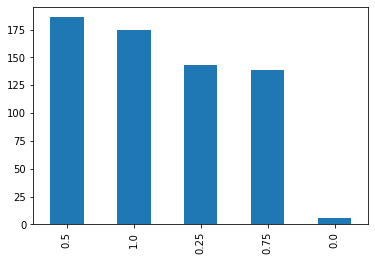

Fedu


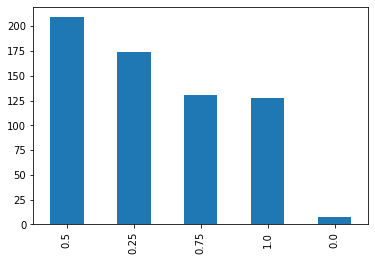

studytime


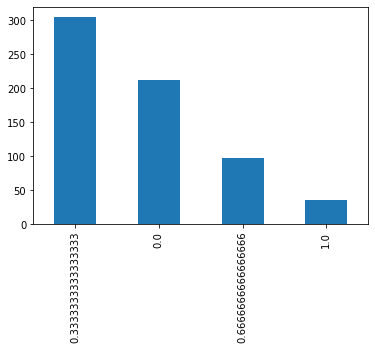

higher


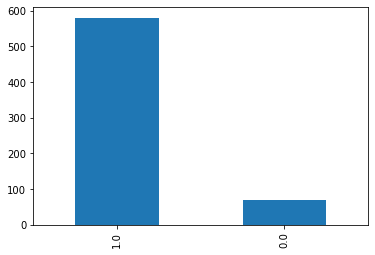

reason


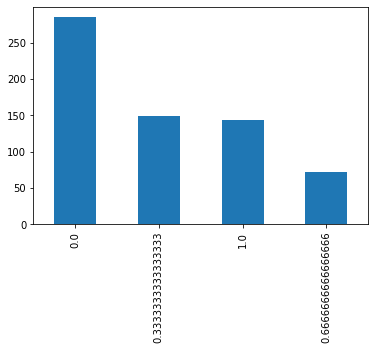

internet


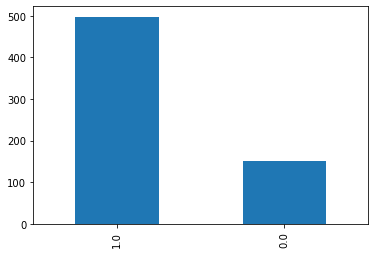

In [12]:
#Visualizing the important data

df_copy['Medu'].value_counts().plot(kind = 'bar')
print("Medu")
plt.show()

df_copy['Fedu'].value_counts().plot(kind = 'bar')
print("Fedu")
plt.show()

df_copy['studytime'].value_counts().plot(kind = 'bar')
print("studytime")
plt.show()

df_copy['higher'].value_counts().plot(kind = 'bar')
print("higher")
plt.show()

df_copy['reason'].value_counts().plot(kind = 'bar')
print("reason")
plt.show()

df_copy['internet'].value_counts().plot(kind = 'bar')
print("internet")
plt.show()

G1


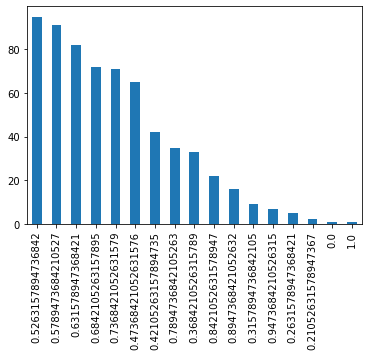

G2


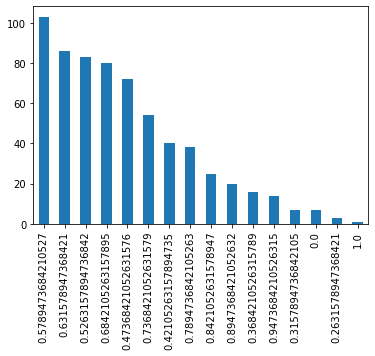

G3


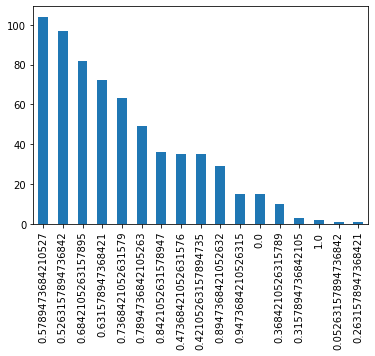

In [13]:
#showing the values of the different test scores

df_copy['G1'].value_counts().plot(kind = 'bar')
print("G1")
plt.show()

df_copy['G2'].value_counts().plot(kind = 'bar')
print("G2")
plt.show()

df_copy['G3'].value_counts().plot(kind = 'bar')
print("G3")
plt.show()

In [14]:
# ive decided to average the three test score together and use the average for my models

average_grade


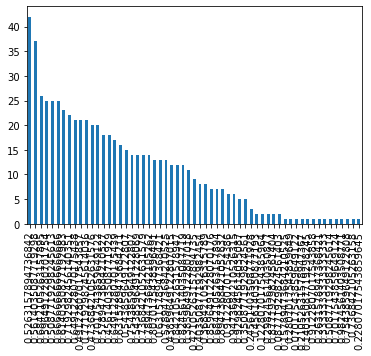

In [15]:
df_copy['average_grade'] = ((df_copy['G1'] + df_copy['G2'] + df_copy['G3']) / 3)

df_copy['average_grade'].value_counts().plot(kind = 'bar')
print("average_grade")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error



In [17]:
#the first model I will try is Linear regression

In [18]:
#split the data

student_features = df_copy.drop(columns = ['average_grade', 'G1', 'G2', 'G3']).values
student_grade = df_copy['average_grade'].values

X_train,X_test,y_train,y_test = train_test_split(student_features,
                                                 student_grade,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(519, 9)
(130, 9)


In [19]:
#train the model


In [20]:
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 0.6052800594936281
coefficients  is [ 0.01256975  0.01141362  0.01364875  0.00486393 -0.00684904  0.01136008
  0.02522873  0.04047061  0.01082657]
prediction for training set:
MAE is: 0.10053291362348594
MSE is: 0.01673873206058006
RMSE is: 0.1293782518840785


prediction for testing set:
MAE is: 0.10822192312858811
MSE is: 0.020096085486432373
RMSE is: 0.14176066269043883


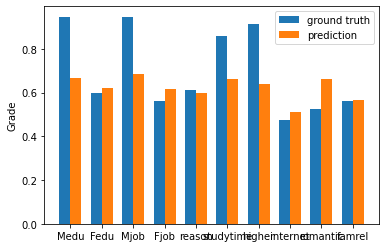

In [21]:
#Testing the model

y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['Medu','Fedu','Mjob','Fjob','reason','studytime','higher','internet','romantic','famrel']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:10], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:10], width, label='prediction')

ax.set_ylabel('Grade')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [22]:
#these points are not all accuretly predicted will check other models as well as removing more features

In [23]:
student_features = df_copy.drop(columns = ['average_grade','G1','G2', 'G3']).values
student_grade = df_copy['average_grade'].values

X_train,X_test,y_train,y_test = train_test_split(student_features,
                                                 student_grade,
                                                 test_size=0.3,
                                                 random_state=38)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(454, 9)
(195, 9)


bias is 0.616469588067084
coefficients  is [0.01015734 0.02190141 0.00991777 0.00991108 0.00166679 0.01372092
 0.02204897 0.03506714 0.00946425]
prediction for training set:
MAE is: 0.09998944405358555
MSE is: 0.016356756799484784
RMSE is: 0.12789353697308078
prediction for testing set:
MAE is: 0.1080991065610879
MSE is: 0.020060446077736025
RMSE is: 0.14163490416467273


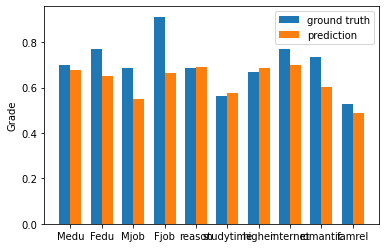

In [24]:
#comparing the results of the training and testing sets for Linear Regression

lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['Medu','Fedu','Mjob','Fjob','reason','studytime','higher','internet','romantic','famrel']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:10], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:10], width, label='prediction')

ax.set_ylabel('Grade')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [25]:
#changing the parameters helped the model

In [26]:
#ridge regression

In [27]:
rr = Ridge()
#training for the testing set

rr.fit(X_train, y_train)
y_train_pred = rr.predict(X_train)
y_test_pred = rr.predict(X_test)

mae  = mean_absolute_error(y_test_pred, y_test)
mse  = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)

print('prediction for Ridge Regression testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print("bias is "+ str(rr.intercept_))
print("coefficient is " + str(rr.coef_))
print()

prediction for Ridge Regression testing set:
MAE is: 0.10807529178126181
MSE is: 0.02005763970301722
RMSE is: 0.14162499674498574
bias is 0.616469588067084
coefficient is [0.01014746 0.02185234 0.00994415 0.00991692 0.00167615 0.01370151
 0.02201877 0.03499885 0.00945369]



In [28]:
#Running Ridge Regerssion with several parameters to comapre

rr = Ridge(alpha = 0)

rr.fit(X_train, y_train)
y_test_pred = rr.predict(X_test)

mae  = mean_absolute_error(y_test_pred, y_test)
mse  = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)


print('prediction for lambda = 0:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print("bias is "+ str(rr.intercept_))
print("coefficient is " + str(rr.coef_))
print()


rr = Ridge(alpha = 1)

rr.fit(X_train, y_train)
y_test_pred = rr.predict(X_test)

mae  = mean_absolute_error(y_test_pred, y_test)
mse  = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)


print('prediction for lambda = 1:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print("bias is "+ str(rr.intercept_))
print("coefficient is " + str(rr.coef_))
print()



rr = Ridge(alpha = 5)

rr.fit(X_train, y_train)
y_test_pred = rr.predict(X_test)

mae  = mean_absolute_error(y_test_pred, y_test)
mse  = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)


print('prediction for lambda = 5:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print("bias is "+ str(rr.intercept_))
print("coefficient is " + str(rr.coef_))
print()



rr = Ridge(alpha = 10)

rr.fit(X_train, y_train)
y_test_pred = rr.predict(X_test)

mae  = mean_absolute_error(y_test_pred, y_test)
mse  = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)


print('prediction for lambda = 10:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print("bias is "+ str(rr.intercept_))
print("coefficient is " + str(rr.coef_))
print()



rr = Ridge(alpha = 20)

rr.fit(X_train, y_train)
y_test_pred = rr.predict(X_test)

mae  = mean_absolute_error(y_test_pred, y_test)
mse  = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)


print('prediction for lambda = 20:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print("bias is "+ str(rr.intercept_))
print("coefficient is " + str(rr.coef_))
print()

prediction for lambda = 0:
MAE is: 0.10809910656108788
MSE is: 0.020060446077736015
RMSE is: 0.14163490416467267
bias is 0.616469588067084
coefficient is [0.01015734 0.02190141 0.00991777 0.00991108 0.00166679 0.01372092
 0.02204897 0.03506714 0.00946425]

prediction for lambda = 1:
MAE is: 0.10807529178126181
MSE is: 0.02005763970301722
RMSE is: 0.14162499674498574
bias is 0.616469588067084
coefficient is [0.01014746 0.02185234 0.00994415 0.00991692 0.00167615 0.01370151
 0.02201877 0.03499885 0.00945369]

prediction for lambda = 5:
MAE is: 0.10798100207721803
MSE is: 0.020046857738157675
RMSE is: 0.14158692643799312
bias is 0.616469588067084
coefficient is [0.010108   0.02166155 0.01004487 0.00993862 0.00171311 0.01362427
 0.02189848 0.03472878 0.00941177]

prediction for lambda = 10:
MAE is: 0.10786820437748401
MSE is: 0.020034332257640387
RMSE is: 0.14154268705108147
bias is 0.616469588067084
coefficient is [0.01005888 0.02143454 0.01016069 0.00996225 0.00175821 0.01352872
 0.02174

#at first the models did not pefrom well, so I tried logistic regression as well

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)




df_copy2 = df.drop(columns = [ 'Medu', 'Fedu', 'higher', 'famrel'])
df_copy2['average_grade'] = (( df_copy['G1'] + df_copy['G2'] + df_copy['G3']) / 3)

#creating my own target catergory to use logistic regression. If a students avg is above a 70 (14/20) then they are
#not a problem, anyone else is a 1
df_copy2['target'] = 0



#goes through each avg and sees if its above 14.0 and adds that students target value
for i in range(len(df_copy2)):
    
    if df_copy2.iat[i, -2] >= 0.70:
        df_copy2.iat[i, -1] = 0
    else:
        df_copy2.iat[i, -1] = 1
        
df_copy2['target']

0      1
1      1
2      1
3      0
4      1
      ..
644    1
645    0
646    1
647    1
648    1
Name: target, Length: 649, dtype: int64

In [30]:
#splitting the data

train_val = df_copy2.drop(columns = ['average_grade','target', 'G1', 'G2', 'G3']).values
test_set  = df_copy2['target'].values

X_train_val, X_test, y_train_val, y_test = train_test_split(train_val, test_set, 
                                                            test_size=0.13, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)


train_val: 564, test: 85


In [31]:
#training and testing the data for logistic regression

folds = 12

num_train_val = X_train_val.shape[0] 

index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

regularization_coefficient = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 20, 50, 100]

best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
        
        # training set
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        # validation set
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        # build the model with different hyperparameters
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #train the model with the training set
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg

[[ 52 223  67 539 527 269 286 157 394 413 449 349 403 491 536  76 246 189
  454 427 547 109 353  38 551 338 354  79 302 545  80 290 405 433 123 160
  468 168 179 414 237 204 144 201 150 528 560]
 [209 522 146 343 441 266  86 366 508 217 205 470 512 532 107 484 255 478
   97 112 485 460  88  95  59 319 434 303 154  51  25 483 462 476 306 101
  437 320 516  20 447 254 125 542 182 285 396]
 [191 143 128 242 548 385  75 418 523  65 121 404 315  27  46 245 250  66
  249 158 467 360 530 317 243 177 220  13 116 141 339  60 531 296 231 515
   19 510  48 442 282 130 240 216 314 196 170]
 [511 159 318 270 244 276 375 234 524 397 173 356 445   7 443 225 105   2
  529 103  18 357 281   9 387  54 423  34 126 557 493 132 111 546 297 534
   15 277 313 411 554 330  17 133 393 541 142]
 [503 517 113 326  23 504 218  57 471 210  77  49 280 361 292 208 426 416
  213  50 329 260 308 226 369  11 108  91 106 332  72 311 424 401  58 294
  489  82 310 148 453 410 435 239 479 378 481]
 [533 333 337 382 153  56

In [32]:
#just to try, I also used K-nearest neighbors to see how it would perform

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

#split data
train_val = df_copy2.drop(columns = ['average_grade','target', 'G1', 'G2', 'G3']).values
test_set  = df_copy2['target'].values

X_train_val, X_test, y_train_val, y_test = train_test_split(train_val, test_set, 
                                                            test_size=0.13, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

#normalize features
normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

train_val: 564, test: 85


In [33]:
k_range = range(1, 6)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(X_train_val, y_train_val)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_val, y_train_val)

print(grid.best_score_)
print(grid.best_params_)

0.6914823008849558
{'n_neighbors': 1}


In [34]:

# evaluate the model on the testing set
y_test_pred = clf_knn.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

accuracy: 0.694, recall: 0.742, precision: 0.821, f1: 0.780,


In [35]:
#K-nearest did not perform well compared to other models